Продукт, который принёс максимальную выручку: Health and beauty
День с наибольшей суммой продаж: 2019-03-30


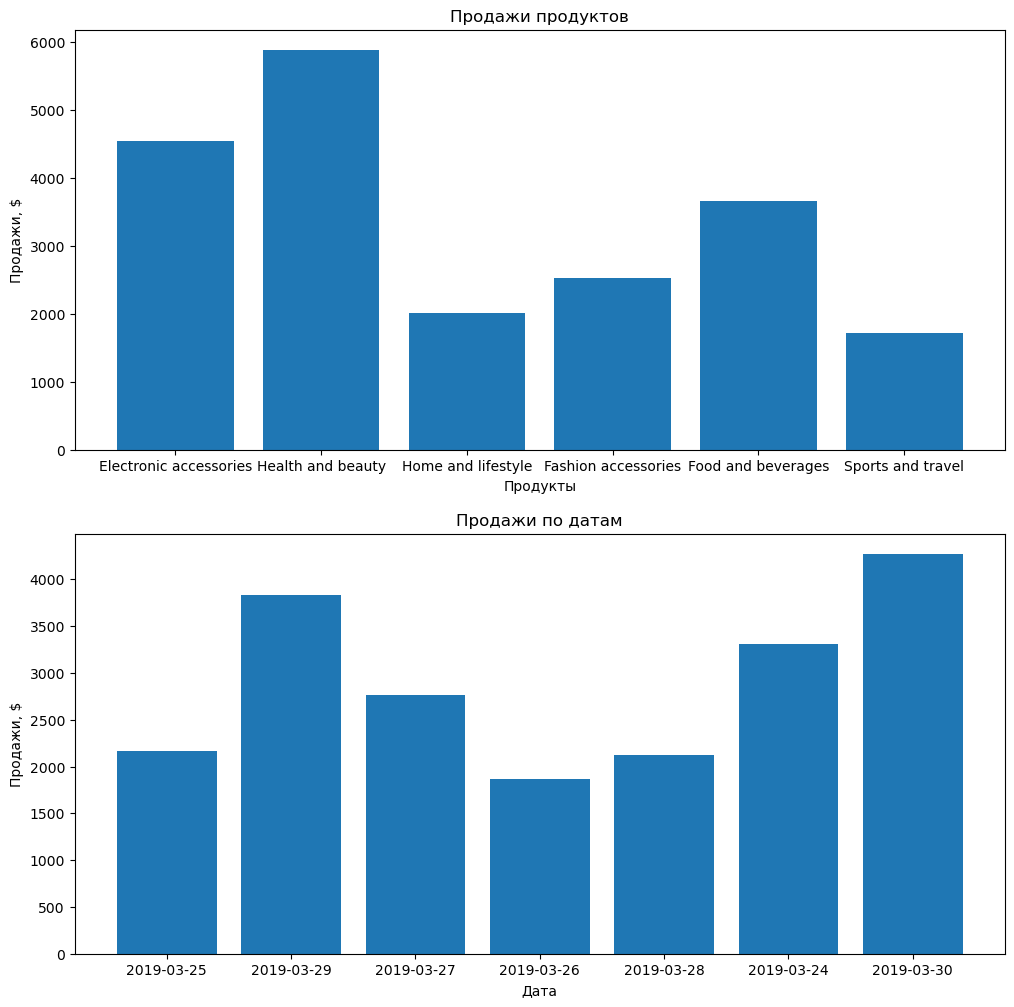

In [91]:
# import pandas as pd
# df = pd.read_csv('super_sales_data.csv') 
# df = df[['product_name','price','quantity','date']]
# df['date'] = pd.to_datetime(df['date'])
# df = df[df['date'] > '2019-03-23']
# df
# df.to_csv('sales_data.csv', index=False, sep=';')

import matplotlib.pyplot as plt

def read_sales_data(file_path):
    """ Функция, которая создает пустой список продаж, затем открывает файл по его пути, 
    построчно его читает, разбивая строки на части для получения данных для записи в словарь 
    и заполняет список продаж полученными словарями и возвращет итоговый список """   
    sales_data = []
    with open(file_path, "r") as file:
        for line in file:
            part = line.strip().split(';')
            sale = {
                'product_name': part[0],
                'price': float(part[1]),
                'quantity': int(part[2]),
                'date': part[3]
            }
            sales_data.append(sale)
    return sales_data

def total_sales_per_product(sales_data):
    """ Функция, которая создает пустой словарь, проходит по всем словарям из списка продаж,
    собирая значения имени продукта и вычисляя стоимость заказа, а затем добавляет новый продукт 
    в словарь, если его там ещё нет, либо суммирует стоимость заказа к имеющемуся продукту и возвращает
    итоговый словарь"""
    total_sales_per_product = {}
    for sale in sales_data:
        product_name = sale['product_name']
        total_cost = sale['quantity'] * sale['price']
        if product_name in total_sales_per_product:
            total_sales_per_product[product_name] += total_cost
        else:
            total_sales_per_product[product_name] = total_cost
    return total_sales_per_product

def sales_over_time(sales_data):
    """ Функция, которая создает пустой словарь, проходит по всем словарям из списка продаж,
    собирая значения дат продаж и вычисляя стоимость заказа, а затем добавляет новые даты 
    в словарь, если их там ещё нет, либо суммирует стоимость заказа к имеющейся дате и возвращает
    итоговый словарь"""
    sales_over_time = {}
    for sale in sales_data:
        sale_date = sale['date']
        total_cost = sale['quantity'] * sale['price']
        if sale_date in sales_over_time:
            sales_over_time[sale_date] += total_cost
        else:
            sales_over_time[sale_date] = total_cost
    return sales_over_time
    

file_path = 'C:/Users/tempi/Downloads/sales_data.csv'
sales_data = read_sales_data(file_path)
total_sales_per_product = total_sales_per_product(sales_data)
sales_over_time = sales_over_time(sales_data)

max_revenue_product = max(total_sales_per_product, key=total_sales_per_product.get)
print(f"Продукт, который принёс максимальную выручку: {max_revenue_product}")

max_revenue_date = max(sales_over_time, key=sales_over_time.get)
print(f"День с наибольшей суммой продаж: {max_revenue_date}")

product = list(total_sales_per_product.keys())
sales_per_product = list(total_sales_per_product.values())

dates = list(sales_over_time.keys())
sales_per_date = list(sales_over_time.values())

fig, axs = plt.subplots(2, 1, figsize = (12, 12))

axs[0].bar(product, sales_per_product)
axs[0].set_title('Продажи продуктов')
axs[0].set_xlabel('Продукты') 
axs[0].set_ylabel('Продажи, $') 
axs[0].set_xticks(product) 

axs[1].bar(dates, sales_per_date)
axs[1].set_title('Продажи по датам')
axs[1].set_xlabel('Дата') 
axs[1].set_ylabel('Продажи, $') 
axs[1].set_xticks(dates)

plt.show()


